In [47]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats as st

In [50]:
data = pd.read_csv("Base_donnees.csv", sep=",")

In [42]:
data.head()

,Date,Jour,Chaine,Heure_prgm1,Titre_prgm1,Type_prgm1,Duree_prgm1,Nbre_episodes_prgm1,Age_conseille_prgm1,Heure_prgm2,Titre_prgm2,Type_prgm2,Duree_prgm2,Nbre_episodes_prgm2,Age_conseille_prgm2,Part_de_marche,Annee,Mois,Week end
0,08 octobre 2014,mercredi,TF1,20.55,Blacklist,Serie TV,110.0,2.0,-10 ans,22.40,Arrow,Serie TV,100.0,3.0,-10 ans,24.0,2014,octobre,0
1,08 octobre 2014,mercredi,France 2,20.50,Les hommes de l'ombre,Serie TV,120.0,2.0,Tout public,22.40,Un soir à la tour Eiffel,Magazine,100.0,0.0,Tout public,13.0,2014,octobre,0
2,08 octobre 2014,mercredi,France 3,20.45,Des racines et des ailes,Magazine,115.0,0.0,Tout public,23.36,Le comte Ory,Divertissement,144.0,0.0,Tout public,12.0,2014,octobre,0
3,08 octobre 2014,mercredi,Canal +,20.55,Diana,Film,110.0,0.0,Tout public,22.45,9 mois ferme,Film,80.0,0.0,Tout public,NaN,2014,octobre,0
4,08 octobre 2014,mercredi,France 5,20.40,La maison France 5,Magazine,60.0,0.0,Tout public,21.40,"Silence, ça pousse !",Magazine,49.0,0.0,Tout public,2.0,2014,octobre,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30980 entries, 0 to 30979
Data columns (total 18 columns):
Jour                   30980 non-null object
Chaine                 30980 non-null object
Heure_prgm1            30980 non-null float64
Titre_prgm1            30980 non-null object
Type_prgm1             30980 non-null object
Duree_prgm1            30980 non-null float64
Nbre_episodes_prgm1    30980 non-null float64
Age_conseille_prgm1    30980 non-null object
Heure_prgm2            30980 non-null object
Titre_prgm2            30980 non-null object
Type_prgm2             30980 non-null object
Duree_prgm2            30980 non-null float64
Nbre_episodes_prgm2    30980 non-null float64
Age_conseille_prgm2    30980 non-null object
Part_de_marche         30980 non-null float64
Annee                  30980 non-null int64
Mois                   30980 non-null object
Week end               30980 non-null int64
dtypes: float64(6), int64(2), object(10)
memory usage: 4.3+ MB


## Gestion unnamed

In [5]:
data = data.drop(data.columns[0],axis='columns')

## Gestion date

In [6]:
def annee(string):
    parts = string.split(' ')
    return parts[2]
def mois(string):
    parts = string.split(' ')
    return parts[1]

In [7]:
data['Annee'] = data['Date']
data['Annee'] = data['Annee'].apply(annee)
data['Mois'] = data['Date']
data['Mois'] = data['Mois'].apply(mois)

In [8]:
data.head()

,Date,Jour,Chaine,Heure_prgm1,Titre_prgm1,Type_prgm1,Duree_prgm1,Nbre_episodes_prgm1,Age_conseille_prgm1,Heure_prgm2,Titre_prgm2,Type_prgm2,Duree_prgm2,Nbre_episodes_prgm2,Age_conseille_prgm2,Part_de_marche,Annee,Mois
0,08 octobre 2014,mercredi,TF1,20.55,Blacklist,Serie TV,110,2.0,-10 ans,22.40,Arrow,Serie TV,100,3.0,-10 ans,24.4,2014,octobre
1,08 octobre 2014,mercredi,France 2,20.50,Les hommes de l'ombre,Serie TV,120,2.0,Tout public,22.40,Un soir à la tour Eiffel,Magazine,100,0.0,Tout public,13.1,2014,octobre
2,08 octobre 2014,mercredi,France 3,20.45,Des racines et des ailes,Magazine,115,0.0,Tout public,23.36,Le comte Ory,Opera,144,0.0,Tout public,12,2014,octobre
3,08 octobre 2014,mercredi,Canal +,20.55,Diana,Film,110,0.0,Tout public,22.45,9 mois ferme,Film,80,0.0,Tout public,NaN,2014,octobre
4,08 octobre 2014,mercredi,France 5,20.40,La maison France 5,Magazine,60,0.0,Tout public,21.40,"Silence, ça pousse !",Magazine,49,0.0,Tout public,2.6,2014,octobre


## Gestion Jour (week-end ou non ?)

In [9]:
def weekend(string):
    if string == 'samedi' or string == 'dimanche':
        D = 1
    else:
        D = 0
    return D

In [10]:
data['Week end'] = data['Jour']
data['Week end'] = data['Week end'].apply(weekend)

## Gestion chaîne

In [11]:
def Tableau_freq(effectifs):
    modalites = effectifs.index # l'index de effectifs contient les modalités

    tab = pd.DataFrame(modalites, columns = ["Programme"]) # création du tableau à partir des modalités
    tab["n"] = effectifs.values
    tab["f"] = (tab["n"] / len(data))*100 # len(data) renvoie la taille de l'échantillon
    return tab

In [12]:
effectifs = data["Chaine"].value_counts()
Tableau_freq(effectifs)

,Programme,n,f
0,RMC Decouverte,1962,4.041028
1,France 4,1961,4.038969
2,M6,1960,4.036909
3,Arte,1960,4.036909
4,TMC,1960,4.036909
5,France 3,1959,4.034849
6,France 5,1958,4.032790
7,France 2,1957,4.030730
8,W9,1956,4.028670
9,TF1,1956,4.028670


RTL 9 et l'autre apparaissent très peu de fois, on les enlève.

In [13]:
data = data.drop(data[data.Chaine == 'RTL 9'].index)
data = data.drop(data[data.Chaine == '35_" hr'].index)

In [14]:
effectifs = data["Chaine"].value_counts()
Tableau_freq(effectifs)

,Programme,n,f
0,RMC Decouverte,1962,4.053803
1,France 4,1961,4.051737
2,TMC,1960,4.049670
3,Arte,1960,4.049670
4,M6,1960,4.049670
5,France 3,1959,4.047604
6,France 5,1958,4.045538
7,France 2,1957,4.043472
8,TF1,1956,4.041406
9,C8,1956,4.041406


## Gestion heure programme

In [15]:
effectifs = data["Heure_prgm1"].value_counts()
tab = Tableau_freq(effectifs)

In [16]:
tab.to_csv('heure prog.csv',index=False)

## Gestion type programme

In [17]:
effectifs = data["Type_prgm2"].value_counts()
Tableau_freq(effectifs)

,Programme,n,f
0,Magazine,14001,28.928284
1,Serie TV,8151,16.841257
2,Documentaire,7354,15.194529
3,Film,6207,12.824645
4,Telefilm,3891,8.039422
5,Divertissement,2105,4.349263
6,Information,1459,3.014525
7,Telerealitee,1378,2.847166
8,Spectacle,643,1.328540
9,Talk-Show,529,1.092998


In [18]:
def Prog(string):
    if string == 'Telerealitee' or string == 'Jeu' or string == 'Spectacle' or string == 'Concert' or string == 'Theatre' or string == 'Dessin-anime' or string == 'Ceremonie' or string == 'Gala' or string == 'Opera' or string == 'Clips' or string == 'Talk-Show' or string == 'Danse' or string == 'Musique' or string == 'Ballet':
        P = 'Divertissement'
    elif string == 'Reportage' or string == 'Making-of':
        P = 'Magazine'
    elif string == 'Journal' or string == 'Debat':
        P = 'Information'
    else:
        P = string
    return P

In [19]:
data['Type_prgm1'] = data['Type_prgm1'].apply(Prog)
data['Type_prgm2'] = data['Type_prgm2'].apply(Prog)

In [20]:
data = data.drop(data[data.Type_prgm1 == 'Court-metrage'].index)
data = data.drop(data[data.Type_prgm1 == 'Programme Court'].index)
data = data.drop(data[data.Type_prgm2 == 'Court-metrage'].index)
data = data.drop(data[data.Type_prgm2 == 'Programme Court'].index)
data = data.drop(data[data.Type_prgm2 == 'Emission religieuse'].index)
data = data.drop(data[data.Type_prgm2 == 'Fin des emissions'].index)

In [21]:
effectifs = data["Type_prgm1"].value_counts()
Tableau_freq(effectifs)

,Programme,n,f
0,Serie TV,10160,21.015182
1,Film,9718,20.100939
2,Magazine,8891,18.390353
3,Documentaire,6363,13.161378
4,Divertissement,5035,10.414512
5,Telefilm,3622,7.491830
6,Sport,2135,4.416084
7,Information,1156,2.391098


In [22]:
effectifs = data["Type_prgm2"].value_counts()
Tableau_freq(effectifs)

,Programme,n,f
0,Magazine,14012,28.982749
1,Serie TV,8143,16.843172
2,Documentaire,7354,15.211186
3,Film,6205,12.834567
4,Divertissement,5511,11.399082
5,Telefilm,3890,8.046167
6,Information,1887,3.903115
7,Sport,370,0.765317


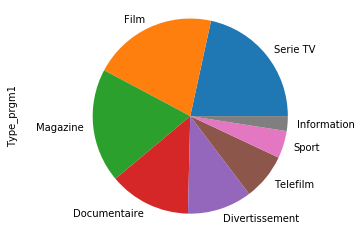

In [23]:
data["Type_prgm1"].value_counts(normalize=True).plot(kind='pie')
plt.axis('equal') 
plt.show()

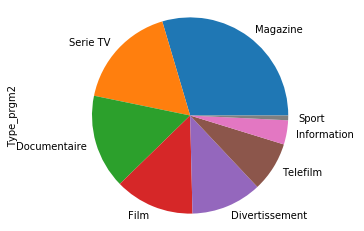

In [24]:
data["Type_prgm2"].value_counts(normalize=True).plot(kind='pie')
plt.axis('equal') 
plt.show()

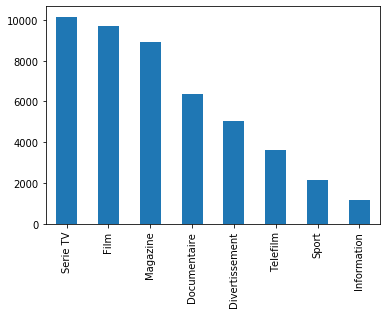

In [25]:
data["Type_prgm1"].value_counts().plot(kind='bar')
plt.show()

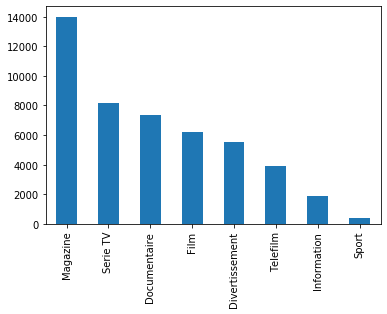

In [26]:
data["Type_prgm2"].value_counts().plot(kind='bar')
plt.show()

## Gestion duree programme

In [12]:
def Duree_prog(string):
    parts = string.split(' ')
    if string == "nan":
        return np.nan
    else:
        return parts[0]

In [13]:
data['Duree_prgm2'] = data['Duree_prgm2'].astype(str)
data['Duree_prgm2'] = data['Duree_prgm2'].apply(Duree_prog)
data

,Unnamed: 0,Date,Jour,Chaine,Heure_prgm1,Titre_prgm1,Type_prgm1,Duree_prgm1,Nbre_episodes_prgm1,Age_conseille_prgm1,Heure_prgm2,Titre_prgm2,Type_prgm2,Duree_prgm2,Nbre_episodes_prgm2,Age_conseille_prgm2,Part_de_marche
0,0,08 octobre 2014,mercredi,TF1,20.55,Blacklist,Serie TV,110,2.0,-10 ans,22.40,Arrow,Serie TV,100,3.0,-10 ans,24.4
1,1,08 octobre 2014,mercredi,France 2,20.50,Les hommes de l'ombre,Serie TV,120,2.0,Tout public,22.40,Un soir à la tour Eiffel,Magazine,100,0.0,Tout public,13.1
2,2,08 octobre 2014,mercredi,France 3,20.45,Des racines et des ailes,Magazine,115,0.0,Tout public,23.36,Le comte Ory,Opera,144,0.0,Tout public,12
3,3,08 octobre 2014,mercredi,Canal +,20.55,Diana,Film,110,0.0,Tout public,22.45,9 mois ferme,Film,80,0.0,Tout public,NaN
4,4,08 octobre 2014,mercredi,France 5,20.40,La maison France 5,Magazine,60,0.0,Tout public,21.40,"Silence, ça pousse !",Magazine,49,0.0,Tout public,2.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48547,48547,17 juin 2019,NaN,"35_"" hr",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48548,48548,18 juin 2019,NaN,"35_"" hr",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48549,48549,30 juin 2019,NaN,"35_"" hr",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48550,48550,28 juillet 2019,NaN,Gulli,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.5


In [14]:
effectifs = data["Duree_prgm2"].value_counts()
tab = Tableau_freq(effectifs)
tab.to_csv('duree prog.csv',index=False)

In [11]:
def Duree_prog_na(duree):
    if duree == "nan":
        return np.nan
    return duree

In [31]:
data['Duree_prgm1'] = data['Duree_prgm1'].apply(Duree_prog_na)
print(data['Duree_prgm1'].isna().sum())
data['Duree_prgm2'] = data['Duree_prgm2'].apply(Duree_prog_na)
print(data['Duree_prgm2'].isna().sum())

575
575


--------------------
Serie TV
moy:
 124.3033454454329
med:
 110.0
mod:
 0    110.0
dtype: float64


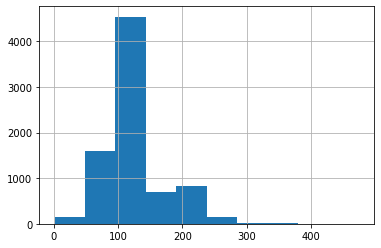

--------------------
Magazine
moy:
 158.03690449563857
med:
 140.0
mod:
 0    240.0
dtype: float64


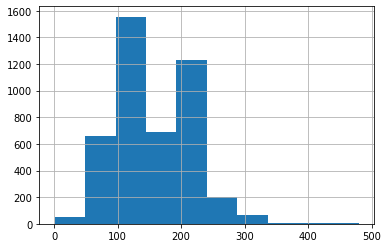

--------------------
Divertissement
moy:
 134.04794520547946
med:
 130.0
mod:
 0    100.0
dtype: float64


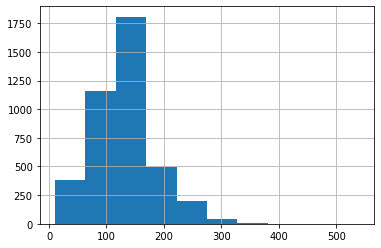

--------------------
Film
moy:
 118.25204806116876
med:
 115.0
mod:
 0    120.0
dtype: float64


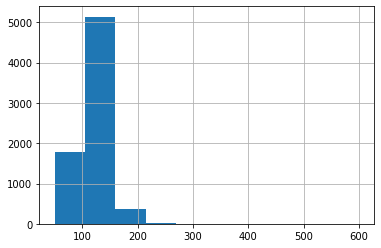

--------------------
Documentaire
moy:
 93.65783258987142
med:
 99.0
mod:
 0    100.0
dtype: float64


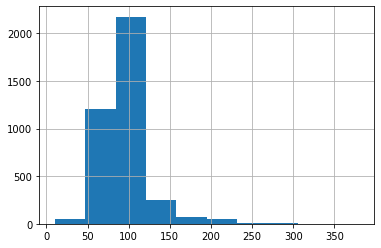

--------------------
Telefilm
moy:
 109.02527988443481
med:
 100.0
mod:
 0    100.0
dtype: float64


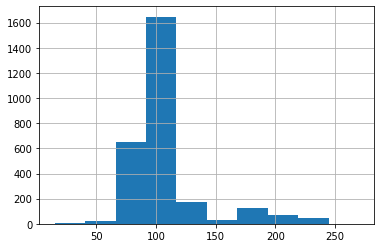

--------------------
Sport
moy:
 136.4119922630561
med:
 125.0
mod:
 0    120.0
dtype: float64


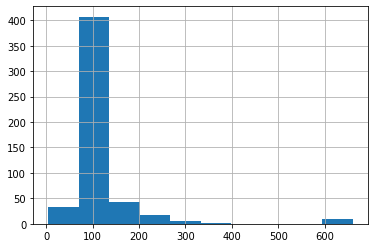

--------------------
Information
moy:
 120.0
med:
 120.0
mod:
 0    150.0
dtype: float64


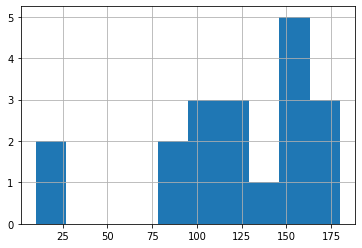

In [7]:
for cat in data["Type_prgm1"].unique():
    subset = data[data.Type_prgm1 == cat] # Création du sous-échantillon
    print("-"*20)
    print(cat)
    print("moy:\n",subset['Duree_prgm1'].mean())
    print("med:\n",subset['Duree_prgm1'].median())
    print("mod:\n",subset['Duree_prgm1'].mode())
    subset["Duree_prgm1"].hist() # Crée l'histogramme
    plt.show() # Affiche l'histogramme

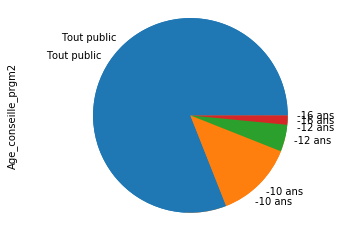

In [15]:
data["Age_conseille_prgm1"].value_counts(normalize=True).plot(kind='pie')
data["Age_conseille_prgm2"].value_counts(normalize=True).plot(kind='pie')
plt.axis('equal') 
plt.show()

In [16]:
plt.subplot?

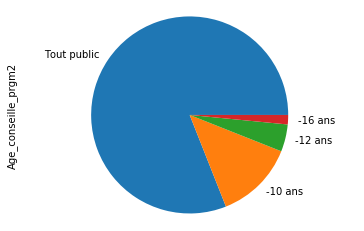

In [9]:
data["Age_conseille_prgm2"].value_counts(normalize=True).plot(kind='pie')
plt.axis('equal') 
plt.show()

In [ ]:
for cat in data["Type_prgm1"].unique():
    subset = data[data.Type_prgm1 == cat] # Création du sous-échantillon
    print("-"*20)
    print(cat)
    print("moy:\n",subset['Part_de_marche'].mean())
    print("med:\n",subset['Duree_prgm1'].median())
    print("mod:\n",subset['Duree_prgm1'].mode())
    subset["Duree_prgm1"].hist() # Crée l'histogramme
    plt.show() # Affiche l'histogramme

In [51]:
effectifs = data["Type_prgm1"].value_counts()
effectifs

Serie TV           10162
Film                9857
Magazine            8890
Documentaire        6375
Telefilm            3625
Divertissement      2351
Sport               2136
Telerealitee        1277
Information          675
Jeu                  542
Spectacle            502
Journal              436
Concert              114
Theatre               87
Dessin-anime          70
Debat                 45
Talk-Show             32
Ceremonie             29
Gala                  26
Opera                 19
Court-metrage         10
Reportage              5
Clips                  2
Programme Court        1
Name: Type_prgm1, dtype: int64

In [59]:
data = pd.read_csv("Base_donnees.csv", sep=",")
type1_ohe = ohe.fit_transform(data["Type_prgm1"]
                              .astype(str)
                              .values
                              .reshape(-1, 1)
                             )
types = type1_ohe.toarray()

n = types.shape[0]
p = types.shape[1]

from sklearn.decomposition import PCA
acp = PCA(svd_solver='full')
coord = acp.fit_transform(types)
eigval = (n-1)/n*acp.explained_variance_
print(eigval)
plt.plot(np.arange(1,p+1),eigval)
plt.title("Scree plot")
plt.ylabel("Eigen values")
plt.xlabel("Factor number")
plt.show()
sqrt_eigval = np.sqrt(eigval)
#corrélation des variables avec les axes
corvar = np.zeros((p,p))
for k in range(p):
    corvar[:,k] = np.around(acp.components_[k,:] * sqrt_eigval[k],3)

#afficher la matrice des corrélations variables x facteurs
print(corvar)

#on affiche pour les deux premiers axes
print(pd.DataFrame({'id':pd.DataFrame(types).columns,'COR_1':corvar[:,0],'COR_2':corvar[:,1],
                    'COR_3':corvar[:,2],'COR_4':corvar[:,3],
                   'COR_5':corvar[:,4],'COR_6':corvar[:,5],
                   'COR_7':corvar[:,6],'COR_8':corvar[:,7]}))
#cercle des corrélations
fig, axes = plt.subplots(figsize=(8,8))
axes.set_xlim(-0.5,0.5)
axes.set_ylim(-0.5,0.5)
#affichage des étiquettes (noms des variables)
for j in range(p):
    plt.annotate(pd.DataFrame(types).columns[j],(corvar[j,0],corvar[j,1]))

#ajouter les axes
plt.plot([-0.5,0.5],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-0.5,0.5],color='silver',linestyle='-',linewidth=1)

#ajouter un cercle
cercle = plt.Circle((0,0),0.5,color='blue',fill=False)
axes.add_artist(cercle)
#affichage
plt.show()

#cercle des corrélations
fig, axes = plt.subplots(figsize=(8,8))
axes.set_xlim(-0.5,0.5)
axes.set_ylim(-0.5,0.5)
#affichage des étiquettes (noms des variables)
for j in range(p):
    plt.annotate(pd.DataFrame(types).columns[j],(corvar[j,1],corvar[j,2]))

#ajouter les axes
plt.plot([-0.5,0.5],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-0.5,0.5],color='silver',linestyle='-',linewidth=1)

#ajouter un cercle
cercle = plt.Circle((0,0),0.5,color='blue',fill=False)
axes.add_artist(cercle)
#affichage
plt.show()

In [95]:
#cosinus carré des variables : qualité de représentation
cos2var = corvar**2
print(pd.DataFrame({'id':pd.DataFrame(types).columns,'COS2_1':cos2var[:,0],'COS2_2':cos2var[:,1],
                   'COS2_3':cos2var[:,2],'COS2_4':cos2var[:,3],
                   'COS2_5':cos2var[:,4],'COS2_6':cos2var[:,5],
                   'COS2_7':cos2var[:,6],'COS2_8':cos2var[:,7]}))
#contributions
ctrvar = cos2var
for k in range(p):
    ctrvar[:,k] = ctrvar[:,k]/eigval[k]
#on n'affiche que pour les deux premiers axes
print(pd.DataFrame({'id':pd.DataFrame(types).columns,'CTR_1':ctrvar[:,0],'CTR_2':ctrvar[:,1],
                   'CTR_3':ctrvar[:,2],'CTR_4':ctrvar[:,3],
                   'CTR_5':ctrvar[:,4],'CTR_6':ctrvar[:,5],
                   'CTR_7':ctrvar[:,6],'CTR_8':ctrvar[:,7]}))

    id    COS2_1    COS2_2    COS2_3    COS2_4    COS2_5    COS2_6    COS2_7  \
0    0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
1    1  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
2    2  0.000000  0.000001  0.000016  0.000064  0.000081  0.000009  0.000225   
3    3  0.000000  0.000001  0.000009  0.000036  0.000049  0.000004  0.000121   
4    4  0.000000  0.000001  0.000004  0.000025  0.000025  0.000004  0.000064   
5    5  0.001444  0.110889  0.027225  0.007225  0.001936  0.000081  0.000529   
6    6  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
7    7  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
8    8  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
9    9  0.119716  0.024964  0.012321  0.005776  0.001764  0.000081  0.000529   
10  10  0.000000  0.000001  0.000009  0.000036  0.000036  0.000004  0.000081   
11  11  0.000001  0.000016  0.000196  0.

    id     CTR_1     CTR_2     CTR_3     CTR_4     CTR_5     CTR_6     CTR_7  \
0    0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
1    1  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
2    2  0.000000  0.000005  0.000110  0.000714  0.001387  0.000196  0.007158   
3    3  0.000000  0.000005  0.000062  0.000402  0.000839  0.000087  0.003849   
4    4  0.000000  0.000005  0.000027  0.000279  0.000428  0.000087  0.002036   
5    5  0.006997  0.581199  0.186560  0.080639  0.033147  0.001765  0.016829   
6    6  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
7    7  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
8    8  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
9    9  0.580070  0.130843  0.084430  0.064467  0.030202  0.001765  0.016829   
10  10  0.000000  0.000005  0.000062  0.000402  0.000616  0.000087  0.002577   
11  11  0.000005  0.000084  0.001343  0.

## Gestion part de marché

In [4]:
def Pdm(string):
    if string == "nan":
        return np.nan
    P = string.replace(",",".")
    parts = P.split('.')
    return parts[0]

In [5]:
data['Part_de_marche'] = data['Part_de_marche'].astype(str)
data['Part_de_marche'] = data['Part_de_marche'].apply(Pdm)
print(data['Part_de_marche'].isna().sum())

16402


In [6]:
data['Part_de_marche'] = data['Part_de_marche'].astype(str)
data.dropna(axis=0, subset=['Part_de_marche'],inplace=True)
data['Part_de_marche'].mean

<bound method Series.mean of 0         24
1         13
2         12
3        nan
4          2
        ... 
48547    nan
48548    nan
48549    nan
48550      0
48551    nan
Name: Part_de_marche, Length: 48552, dtype: object>

In [9]:
effectifs = data["Part_de_marche"].value_counts()
tab = Tableau_freq(effectifs)
tab.to_csv('PdM.csv',index=False)

In [96]:
data.to_csv('base propre.csv',index=False)

# Avec le fichier .py

In [2]:
import Nettoyage_base

In [3]:
data = Nettoyage_base.pd.read_csv("Base_donnees.csv", sep=",")

In [7]:
data = Nettoyage_base.nettoyage(data)

In [8]:
data.to_csv('base propre.csv',index=False)